# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import doubleml as dml
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from linearmodels.panel.utility import generate_panel_data

from doubleml.datasets import (
    make_plr_CCDDHNR2018, #Linear Regression
    make_pliv_CHS2015, #Instrumental variables
    make_did_SZ2020 #Panel Data
)
from sklearn.ensemble import RandomForestRegressor

from sklearn.base import clone

# Main imports
from econml.panel.dml import DynamicDML
#from econml.tests.dgp import DynamicPanelDGP, add_vlines

# Helper imports
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression, LogisticRegressionCV, MultiTaskLassoCV
import matplotlib.pyplot as plt

%matplotlib inline

/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import doubleml as dml
from doubleml.datasets import make_pliv_CHS2015
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

In [5]:
import sys
sys.path.append('/Applications/Stata/utilities')
from pystata import config
config.init('se')

from pystata import stata


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 15 Oct 2024
Serial number: 401809305874
  Licensed to: Gabriel Dias Medeiros Pereira
               ISEG

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


# Acemoglu

In [6]:
df = pd.read_stata("/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/data/xcountry_data.dta", convert_dates=False)

In [5]:
df

,code,africa,lat_abst,asia,baseco,f_brit,f_french,temp1,temp2,temp3,...,Yrsmis60,ruleoflaw,protmiss,dummy_dennis,neoeuropes,logpgdp05,tyr05_n,lcapped,prienr1870,prienr1940
0,AGO,1.0,0.136667,0.0,1.0,0.0,0.0,26.0,28.0,37.0,...,82.0,-1.22,0.473416,0.0,0.0,8.199643,2.169000,5.521461,0.1,0.600000
1,ARG,0.0,0.377778,0.0,1.0,0.0,0.0,17.0,25.0,40.0,...,124.0,-0.67,0.486717,0.0,0.0,9.290390,8.870034,4.232656,NaN,NaN
2,AUS,0.0,0.300000,0.0,1.0,1.0,0.0,17.0,18.0,43.0,...,NaN,1.74,0.038857,1.0,1.0,10.395712,11.943940,2.145931,NaN,NaN
3,BFA,1.0,0.144444,0.0,1.0,0.0,1.0,29.0,38.0,48.0,...,37.0,-0.22,0.039800,0.0,0.0,6.914727,0.728000,5.521461,0.1,2.000000
4,BGD,0.0,0.266667,1.0,1.0,1.0,0.0,25.0,29.0,42.0,...,165.0,-0.76,0.066095,0.0,0.0,7.060130,4.186033,4.268438,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,USA,0.0,0.422222,0.0,1.0,1.0,0.0,27.0,32.0,37.0,...,NaN,1.55,0.018649,1.0,1.0,10.658870,13.190048,2.708050,NaN,NaN
60,VEN,0.0,0.088889,0.0,1.0,0.0,0.0,20.0,28.0,33.0,...,77.0,-1.59,0.435332,0.0,0.0,9.202758,5.800205,4.357990,1.6,26.700001
61,VNM,0.0,0.177778,1.0,1.0,0.0,1.0,25.0,33.0,43.0,...,49.0,-0.45,0.012681,0.0,0.0,7.678452,4.928604,4.941642,0.1,10.800000
62,ZAF,1.0,0.322222,0.0,1.0,1.0,0.0,19.0,29.0,39.0,...,223.0,0.09,2.524327,0.0,0.0,9.059149,7.743558,2.740840,NaN,NaN


In [21]:
df.columns

Index(['code', 'africa', 'lat_abst', 'asia', 'baseco', 'f_brit', 'f_french',
       'temp1', 'temp2', 'temp3', 'temp4', 'temp5', 'humid1', 'humid2',
       'humid3', 'humid4', 'malfal94', 'lpd1500s', 'america', 'prienr1900',
       'cath1900', 'prot1900', 'musl1900', 'Yrsmis60', 'ruleoflaw', 'protmiss',
       'dummy_dennis', 'neoeuropes', 'logpgdp05', 'tyr05_n', 'lcapped',
       'prienr1870', 'prienr1940'],
      dtype='object')

In [4]:
stata.pdataframe_to_data(df, force=True)

In [7]:
learner = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2)
ml_l = clone(learner)
ml_m = clone(learner)
ml_r = clone(learner)

In [52]:
y_col='logpgdp05'
d_cols=['ruleoflaw', "tyr05_n"]
z_cols=["prienr1900", "protmiss", "lcapped", "lpd1500s"]
x_cols=[col_x for col_x in df.columns if col_x not in [y_col]+d_cols+z_cols+["code", "Yrsmis60", "prienr1870","prienr1940"]]

In [56]:
len(x_cols)

22

In [53]:
cols = [y_col]+d_cols+z_cols+x_cols
df_institutions = df[cols].dropna()

In [54]:
obj_dml_data = dml.DoubleMLData(
    df_institutions, y_col=y_col, d_cols=d_cols,
    z_cols=z_cols, x_cols=x_cols
)

In [55]:
dml_iivm_obj = dml.DoubleMLPLIV(obj_dml_data, ml_l, ml_m, ml_r)
print(dml_iivm_obj.fit().summary)

               coef   std err         t         P>|t|     2.5 %    97.5 %
ruleoflaw  1.089580  0.212876  5.118377  3.081769e-07  0.672350  1.506809
tyr05_n    0.206315  0.075541  2.731159  6.311197e-03  0.058257  0.354374


# Angrist, Kluger (2003)

In [3]:
#df_immigration = pd.read_sas("/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/data/rsa8399n.sas7bdat")
df_immigration = pd.read_stata("../data/df_immigration.dta")

In [4]:
df_immigration['year_datetime'] = df_immigration['year'][:4]

def convert_to_datetime(period):
    year = int(period[:4])
    return pd.to_datetime(f"{year}", format='%Y')

# Apply the function to the 'period' column
df_immigration['year_datetime'] = df_immigration['year'].apply(convert_to_datetime)
df_immigration['year_datetime'] = df_immigration['year_datetime'].dt.year


In [5]:
df_barent = pd.read_sas("../data/bar_ent.sas7bdat")
df_barent.columns = ["country", "bar_ent"]
df_barent['country'] = df_barent['country'].apply(lambda x: x.decode('utf-8'))

In [6]:
df_immigration = pd.merge(df_immigration, df_barent, on='country', how='left')

In [22]:
macroeconomic_variables

['gdp_gr', 'urate', 'lag_gdp', 'schengen', 'p96schen']

In [7]:
# Define the SAS macros as a dictionary
sas_macros = {
    'non_eu_immigration_share':['lnf_lf1'],
    'years': ['lneu_lf1', 'd84', 'd85', 'd86', 'd87', 'd88', 'd89', 'd90', 'd91', 'd92', 'd93', 'd94', 'd95', 'd96', 'd97', 'd98', 'd99'], #
    'country': ['be', 'dk', 'de91', 'de_91', 'gr', 'es', 'fr', 'ie', 'it', 'lu', 'nl', 'at', 'pt', 'fi', 'se', 'uk', 'no', 'is', 'ch'],
    'ctrends': ['trendbe', 'trendk', 'trende91', 'trend_91', 'trendgr', 'trendes', 'trendfr', 'trendie', 'trendit',
                'trendlu', 'trendnl', 'trendat', 'trendpt', 'trendfi', 'trendse', 'trenduk', 'trendno', 'trendis',
                'trendch'],
    'inst1': ['nbospr1', 'nowarpr1', 'nkospr1'],
    "institutions": ['emp_prot','lab_stan','rep_rate'],
    'population_variables': df_immigration.iloc[:, 147:171].columns.tolist(),
    'macroeconomic_variables': df_immigration.iloc[:, 277:280].columns.tolist()+['schengen', 'p96schen']
}

# Unpack the dictionary into variables
non_eu_immigration_share, years, country, ctrends, inst1, institutions, population_variables, macroeconomic_variables = sas_macros.values()

In [8]:
df_immigration["emp_prot"]=df_immigration["emp_prot"]-13
df_immigration["lab_stan"]=(df_immigration["lab_stan"]-5)/1.9518
df_immigration["rep_rate"]=(df_immigration["rep_rate"]-63)/17.70741

In [9]:
df_immigration["ep"]=(df_immigration["bar_ent"]-1.715)/.604373

In [77]:
###### CHANGING THE ORIGINAL SPECIFICATION OF THE MODEL: If i want to replicate the original, i shouldn't go to percentages

# df_immigration['lne_p'] = np.exp(df_immigration['lne_p'])
# df_immigration['lneu_lf1'] = np.exp(df_immigration['lneu_lf1'])
# df_immigration[non_eu_immigration_share] = np.exp(df_immigration[non_eu_immigration_share])

In [10]:
df_immigration['NEU_ep'] = df_immigration['lnf_lf1'] * df_immigration['ep']
df_immigration['NEU_ls'] = df_immigration['lnf_lf1'] * df_immigration['lab_stan']
df_immigration['NEU_rr'] = df_immigration['lnf_lf1'] * df_immigration['rep_rate']

df_immigration['nbos_ep'] = df_immigration['nbospr1'] * df_immigration['ep']
df_immigration['nowar_ep'] = df_immigration['nowarpr1'] * df_immigration['ep']
df_immigration['nkos_ep'] = df_immigration['nkospr1'] * df_immigration['ep']

df_immigration['nbos_ls'] = df_immigration['nbospr1'] * df_immigration['lab_stan']
df_immigration['nowar_ls'] = df_immigration['nowarpr1'] * df_immigration['lab_stan']
df_immigration['nkos_ls'] = df_immigration['nkospr1'] * df_immigration['lab_stan']

df_immigration['nbos_rr'] = df_immigration['nbospr1'] * df_immigration['rep_rate']
df_immigration['nowar_rr'] = df_immigration['nowarpr1'] * df_immigration['rep_rate']
df_immigration['nkos_rr'] = df_immigration['nkospr1'] * df_immigration['rep_rate']

In [12]:
# Define the SAS macros as a dictionary
sas_macros = {
    'first_instruments': ['nbospr1', 'nowarpr1', 'nkospr1'],
    'instls': ['nbos_ls', 'nowar_ls', 'nkos_ls'],
    'instrr': ['nbos_rr', 'nowar_rr', 'nkos_rr'],
    'instlsrr': ['nbos_ls', 'nowar_ls', 'nkos_ls', 'nbos_rr', 'nowar_rr', 'nkos_rr'],
    'inst1b': ['nbosds12', 'noward12', 'nkosds12', 'nbos_ep', 'nowar_ep', 'nkos_ep'],
    'inst2b': ['nbosds12', 'noward12', 'nkosds12', 'nbos_ep', 'nowar_ep', 'nkos_ep', 'nbos_ls', 'nowar_ls', 'nkos_ls'],
    'inst3b': ['nbosds12', 'noward12', 'nkosds12', 'nbos_ep', 'nowar_ep', 'nkos_ep','nbos_ls', 'nowar_ls', 'nkos_ls', 'nbos_rr', 'nowar_rr', 'nkos_rr'] # 
}

# Unpack the dictionary into variables
first_instruments, instls, instrr, instlsrr, inst1b, inst2b, inst3b = sas_macros.values()

## Stata code:

https://economics.mit.edu/sites/default/files/inline-files/t4new.do

/* Generate instruments using distance from Pristina */
gen nowarpr1=nowar*Sardis1/1000
gen nbospr1=nwbosnia*Sardis1/1000
gen nkospr1=nwkosovo*prdis1/1000

gen nowarpr2=nowar*Sardis2/1000
gen nbospr2=nwbosnia*Sardis2/1000
gen nkospr2=nwkosovo*prdis2/1000

/* Generate pre-period spec. check dummy */
gen pre90=(prdis1*(trend>=1988 & trend<=1999))/1000



## SAS code

 %macro years; lneu_lf1 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99 %mend;
 %macro country; be dk de91 de_91 gr es fr ie it lu nl at pt fi se uk no is ch %mend;
 %macro ctrends; trendbe trendk trende91 trend_91 trendgr trendes trendfr trendie trendit
                 trendlu trendnl trendat trendpt trendfi trendse trenduk trendno trendis
                 trendch %mend;
 %macro inst1; nbospr1 nowarpr1 nkospr1 %mend;

 emp_prot=emp_prot-13;
 lab_stan=(lab_stan-5)/1.9518;
 rep_rate=(rep_rate-63)/17.70741;

 ep=(bar_ent-1.715)/.604373;

 NEU_ep=lnf_lf1*ep;
 NEU_ls=lnf_lf1*lab_stan;
 NEU_rr=lnf_lf1*rep_rate;

 nbos_ep=nbospr1*ep;
 nowar_ep=nowarpr1*ep;
 nkos_ep=nkospr1*ep;
 nbos_ls=nbospr1*lab_stan;
 nowar_ls=nowarpr1*lab_stan;
 nkos_ls=nkospr1*lab_stan;
 nbos_rr=nbospr1*rep_rate;
 nowar_rr=nowarpr1*rep_rate;
 nkos_rr=nkospr1*rep_rate;

 %macro instls; %inst1 nbos_ls nowar_ls nkos_ls %mend;
 %macro instrr; %inst1 nbos_rr nowar_rr nkos_rr %mend;
 %macro instlsrr; %inst1 nbos_ls nowar_ls nkos_ls nbos_rr nowar_rr nkos_rr %mend;
 %macro inst1b; nbosds12 noward12 nkosds12 nbos_ep nowar_ep nkos_ep %mend;
 %macro inst2b; %inst1b nbos_ls nowar_ls nkos_ls %mend;
 %macro inst3b; %inst2b nbos_rr nowar_rr nkos_rr %mend;

## Perform regressions

For more info: https://economics.mit.edu/sites/default/files/inline-files/t6new.sas

- OLS, LS, all men with country and time effects

In [ ]:
# **************************************************;
# *            Labor Standards                     *;
# **************************************************;

# ******************Men**************************

# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1)]
data_filtered = data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'dold'] + years + country].dropna()

In [64]:
data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'dold'] + years + country].dropna()

,lne_p,lnf_lf1,NEU_ls,dold,lneu_lf1,d84,d85,d86,d87,d88,...,lu,nl,at,pt,fi,se,uk,no,is,ch
0,-0.143954,-2.468772,-0.000000,0.0,-4.499256,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.160672,-2.468205,-0.000000,0.0,-4.409521,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.150230,-2.424959,-0.000000,0.0,-4.398050,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.140117,-2.476395,-0.000000,0.0,-4.208497,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.133083,-2.502741,-0.000000,0.0,-4.240854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,-0.214826,-3.830824,9.813567,1.0,-4.142182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
826,-0.209440,-3.825722,9.800498,1.0,-4.168144,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
827,-0.208251,-3.760098,9.632385,1.0,-4.155677,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
828,-0.199560,-3.681319,9.430574,1.0,-4.061137,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
# Define the independent variables
X = data_filtered[['lnf_lf1', 'NEU_ls', 'dold'] + years + country]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = data_filtered['lne_p']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lne_p   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     20.20
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.44e-59
Time:                        12:00:06   Log-Likelihood:                 669.81
No. Observations:                 334   AIC:                            -1268.
Df Residuals:                     298   BIC:                            -1130.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0933      0.049     -1.897      0.0

- OLS, BE-LS-RR, all men with country and time effects

In [13]:
# ***********************************************;
# *        Barriers, Lab. Stan., Rep. Rate      *;
# ***********************************************;

# ******************Men**************************;

# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1) & (df_immigration['dold'] == 0)]
data_filtered = data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'NEU_ep', 'NEU_rr'] + years + country].dropna() #, 'dold'

In [80]:
X.shape

(334, 42)

In [81]:
# Define the independent variables
X = data_filtered[['lnf_lf1', 'NEU_ls', 'NEU_ep', 'NEU_rr'] + years + country] #, 'dold']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = data_filtered['lne_p']

# Fit the OLS model
model = sm.OLS(y, X).fit(cov_type="HC1")

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lne_p   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     521.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.43e-124
Time:                        09:43:26   Log-Likelihood:                 377.74
No. Observations:                 167   AIC:                            -681.5
Df Residuals:                     130   BIC:                            -566.1
Df Model:                          36                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1241      0.068     -1.821      0.0

covariance of constraints does not have full rank. The number of constraints is 40, but rank is 37


- Simple OLS estimates

In [20]:
eu_immigration = ['lnf_lf1']

In [36]:
# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1) & (df_immigration['dold'] == 0)]
data_filtered = data_filtered[['lne_p'] + non_eu_immigration + first_instruments + years + country].dropna()

In [37]:
X.shape

(352, 41)

In [38]:
# Define the independent variables
X = data_filtered[non_eu_immigration + first_instruments + years + country]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = data_filtered['lne_p']

# Fit the OLS model
model = sm.OLS(y, X).fit(cov_type="HC3")

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lne_p   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     847.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.67e-169
Time:                        09:31:32   Log-Likelihood:                 466.35
No. Observations:                 202   AIC:                            -856.7
Df Residuals:                     164   BIC:                            -731.0
Df Model:                          37                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1220      0.059     -2.072      0.0

covariance of constraints does not have full rank. The number of constraints is 39, but rank is 38


- Simple 2SLS

In [69]:
from linearmodels.iv import IV2SLS

#from statsmodels.api import add_constant

In [124]:
eu_immigration

['lnf_lf1']

In [53]:
# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1)]
data_filtered = data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'NEU_ep', 'NEU_rr', 'dold'] + first_instruments + eu_immigration+ inst3b + years + country].dropna()

In [ ]:
#Build the dependent variable column
dependent = data_filtered[['lne_p']]

#endogenous variables
endog = data_filtered[non_eu_immigration]

# exogenous variables
exog = data_filtered[first_instruments+years] 

#Build out the instruments matrix. Statsmodels requires this matrix to contain not only all the
# instruments but also the variables in exog that will NOT be instrumented
#instruments = data_filtered[years + inst3b] #+ country + ['dold'] #WORKING!!!
instruments = data_filtered[["nowarpr1", "nbospr1", "nkospr1"]+years] #+ country + ['dold'] #WORKING!!! #["nowarpr1","nbospr1","nkospr1"]

# # # Define the IV regression formula with multiple endogenous variables
# formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
#            '[lnf_lf1  ~ ' + ' + '.join(years[3:]) + ' + ' + ' + '.join(country[2:]) +  ' + ' + ' + '.join(inst3b[2:]) + ']') #+ dold

#### WORKING
# Define the IV regression formula with multiple endogenous variables
formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
           '[lnf_lf1  ~ ' + '+ '.join(instruments) +  ']') #+ dold

###### THE PROBLEM IS WITH THE COUNTRY
# Define the IV regression formula with multiple endogenous variables
# formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
#            '[lnf_lf1  ~ ' + '+ '.join(inst3b) + '+' + ' + '.join(years) +  '+' + ' + '.join(country) + ']') #+ dold

print(formula)

## 2SLS, BE-LS-RR, entire sample with country and time effects

In [35]:
# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1)] # & (df_immigration['dold'] == 0)
data_filtered = data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'NEU_ep', 'NEU_rr'] + first_instruments + inst3b + years + country].dropna()

country_without_is = [i for i in country if i not in ["is", 'ch', 'lu', 'gr']]

In [36]:
#Build the dependent variable column
dependent = ['lne_p']

#endogenous variables
endog = non_eu_immigration_share + ['NEU_ep', 'NEU_ls', 'NEU_rr']

# exogenous variables
exog = country_without_is+years

# instruments
instruments = inst3b+country_without_is+years

In [37]:
stata.pdataframe_to_data(data_filtered, force=True)

stata.run(f'''
    ivregress 2sls {''.join(dependent)} ({' '.join(endog)} = {' '.join(instruments)}) {' '.join(exog)}, vce(robust)
''')


. 
.     ivregress 2sls lne_p (lnf_lf1 NEU_ep NEU_ls NEU_rr = nbosds12 noward12 nk
> osds12 nbos_ep nowar_ep nkos_ep nbos_ls nowar_ls nkos_ls nbos_rr nowar_rr nko
> s_rr be dk de91 de_91 es fr ie it nl at pt fi se uk no lneu_lf1 d84 d85 d86 d
> 87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99) be dk de91 de_91 es fr ie
>  it nl at pt fi se uk no lneu_lf1 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94
>  d95 d96 d97 d98 d99, vce(robust)

Instrumental variables 2SLS regression            Number of obs   =        334
                                                  Wald chi2(36)   =     861.61
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.6609
                                                  Root MSE        =     .03483

------------------------------------------------------------------------------
             |               Robust
       lne_p | Coefficient  std. err.      z    

## 2SLS, BE-LS-RR, all men with country and time effects

stata regression:

ivregress 2sls lne_p (lnf_lf1 NEU_ep NEU_ls NEU_rr = lneu_lf1 nbosds12 noward12 nkosds12 nbos_ep nowar_ep nkos_ep nbos_ls nowar_ls nkos_ls nbos_rr nowar_rr nkos_rr d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99 be dk de91 de_91 gr es fr ie it lu nl at pt fi se uk no is ch) lneu_lf1 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99 be dk de91 de_91 gr es fr ie it lu nl at pt fi se uk no is ch, vce(robust)


In [25]:
# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1) & (df_immigration['dold'] == 0)]
data_filtered = data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'NEU_ep', 'NEU_rr'] + first_instruments + inst3b + years + country].dropna()

country_without_is = [i for i in country if i not in ["is", 'ch', 'lu', 'gr']]

In [18]:
#Build the dependent variable column
dependent = ['lne_p']

#endogenous variables
endog = non_eu_immigration_share + ['NEU_ep', 'NEU_ls', 'NEU_rr']

# exogenous variables
exog = country_without_is+years

# instruments
instruments = inst3b+country_without_is+years

In [19]:
stata.pdataframe_to_data(data_filtered, force=True)

stata.run(f'''
    ivregress 2sls {''.join(dependent)} ({' '.join(endog)} = {' '.join(instruments)}) {' '.join(exog)}, vce(robust)
''')


. 
.     ivregress 2sls lne_p (lnf_lf1 NEU_ep NEU_ls NEU_rr = nbosds12 noward12 nk
> osds12 nbos_ep nowar_ep nkos_ep nbos_ls nowar_ls nkos_ls nbos_rr nowar_rr nko
> s_rr be dk de91 de_91 es fr ie it nl at pt fi se uk no lneu_lf1 d84 d85 d86 d
> 87 d88 d89 d90 d91 d92 d93 d94 d95 d96 d97 d98 d99) be dk de91 de_91 es fr ie
>  it nl at pt fi se uk no lneu_lf1 d84 d85 d86 d87 d88 d89 d90 d91 d92 d93 d94
>  d95 d96 d97 d98 d99, vce(robust)

Instrumental variables 2SLS regression            Number of obs   =        167
                                                  Wald chi2(36)   =    2321.53
                                                  Prob > chi2     =     0.0000
                                                  R-squared       =     0.8473
                                                  Root MSE        =     .02686

------------------------------------------------------------------------------
             |               Robust
       lne_p | Coefficient  std. err.      z    

## DoubleML

- Variable setup

In [45]:
#######################
# Without interactions with institutions
#######################


#Build the dependent variable column
dependent = ['lne_p']

#endogenous variables
endog = non_eu_immigration_share #+ ['NEU_ep', 'NEU_ls', 'NEU_rr']

# exogenous variables
exog = country+years+ctrends+population_variables+macroeconomic_variables #country+years+ctrends+ #+country_without_is #+ ['dold']

# instruments
instruments = first_instruments #inst3b 

year_index_variable = ['year_datetime']

In [41]:
#######################
# With interactions with institutions
#######################

#Build the dependent variable column
dependent = ['lne_p']

#endogenous variables
endog = non_eu_immigration_share + ['NEU_ep', 'NEU_ls', 'NEU_rr']

# exogenous variables
exog = years+ctrends+country #+country_without_is

# instruments
instruments = inst3b #+years+country #+country_without_is

year_index_variable = ['year_datetime']

In [42]:
len(["country"]+year_index_variable+dependent+endog+exog+instruments)

74

In [43]:
# Filter the data
data_filtered = df_immigration[(df_immigration['is'] == 0) & (df_immigration['dman'] == 1) & (df_immigration['dold'] == 0)] # & (df_immigration['dold'] == 0)
#data_filtered = data_filtered[['lne_p'] + ['lnf_lf1', 'NEU_ls', 'NEU_ep', 'NEU_rr'] + first_instruments + inst3b + years + country + ctrends].dropna()
data_filtered = data_filtered[["country"]+year_index_variable+dependent+endog+exog+instruments].dropna()
country_without_is = [i for i in country if i not in ["is", 'ch', 'lu', 'gr']]

In [44]:
data_filtered.shape

(167, 74)

In [39]:
data_filtered['country'].nunique()

17

In [52]:
# # Define the columns to which you want to apply the diff() operation
# columns_to_diff = dependent + population_variables + macroeconomic_variables + non_eu_immigration_share  # replace with your actual column names

# # Set the index for the DataFrame
# data_filtered.set_index(['country', year_index_variable[0]], inplace=True)

# # Apply the diff() operation to the selected columns
# df_diff = data_filtered[columns_to_diff].groupby(level='country').diff()

# # Combine the diffed columns back with the original DataFrame
# df_with_diff = data_filtered.copy()  # make a copy of the original DataFrame
# df_with_diff[columns_to_diff] = df_diff  # update the selected columns with their diffed values

# # Reset the index
# df_with_diff = df_with_diff.dropna().reset_index()

# # Optionally, drop rows with NaN values generated by the diff() operation
# #df_with_diff.dropna(inplace=True)

# # Display the resulting DataFrame
# df_with_diff

,country,year_datetime,lne_p,lnf_lf1,tpop1,tlf,tpop,allpop,natpop,natemp,...,sfeupop1,seulf2,gdp_gr,urate,lag_gdp,schengen,p96schen,nbospr1,nowarpr1,nkospr1
0,AT,1996,-0.016718,0.000567,25.250000,4.993652,25.250000,-9.421753,-14.280396,-28.657471,...,1120.625000,-4759.929688,-0.008,0.346,0.003,0.0,1.0,0.000000,0.262500,0.0000
1,AT,1997,0.010442,0.043246,8.721680,2.349365,8.721680,-19.124756,-9.133057,2.284241,...,13332.531250,5741.469727,0.017,0.051,-0.008,0.0,0.0,0.000000,0.262500,0.0000
2,AT,1998,0.010113,-0.051436,10.360352,35.791748,10.360352,-16.282715,-20.574951,-8.039062,...,-4206.468750,3824.250000,-0.008,0.055,0.017,0.0,0.0,0.000000,0.000000,0.4125
3,AT,1999,0.007034,-0.026346,2.160156,8.629395,2.160156,-19.733154,-19.349365,-10.157104,...,-7195.562500,-4226.050781,0.015,-0.439,-0.008,0.0,0.0,0.000000,0.000000,0.4125
4,BE,1984,-0.013648,-0.160821,68.652832,70.500488,68.652832,56.497192,62.233643,37.014771,...,-16562.484375,-1432.281250,-0.008,0.062,0.024,0.0,0.0,0.000000,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,UK,1995,0.016763,0.021232,104.734375,21.792969,104.734375,-9.017578,-17.560547,100.347656,...,8403.937500,-24977.437500,-0.002,-0.889,-0.016,0.0,0.0,1.003125,0.000000,0.0000
178,UK,1996,-0.000598,0.005102,85.216797,73.320312,85.216797,-15.607422,-12.097656,-14.133789,...,-6008.625000,-16621.562500,0.009,-0.611,-0.002,0.0,0.0,0.000000,1.003125,0.0000
179,UK,1997,0.021285,0.065624,3.394531,1.484375,3.394531,-84.915039,-105.952148,58.487305,...,47669.187500,6500.125000,-0.009,-1.427,0.009,0.0,0.0,0.000000,1.003125,0.0000
180,UK,1998,0.012698,0.078779,37.082031,40.859375,37.082031,-59.432617,-95.692383,6.762695,...,81151.437500,30559.437500,-0.004,-0.563,-0.009,0.0,0.0,0.000000,0.000000,1.1625


In [28]:
from empirical_analysis.run_models import CausalInferenceModels
models = CausalInferenceModels(
    df=data_filtered, #df_with_diff,
    y_column=dependent[0], 
    d_columns=endog,
    x_columns=exog,
    z_columns=instruments, 
    unit_column='country', 
    time_column='Time',
    desired_alpha=0,
    n=data_filtered['country'].nunique()
    )

models.run_hyperparameter_tuning(
    reading_tuned_hp=True,
    simulation_or_empirical="empirical"
)


In [29]:
obj_dml_data = dml.DoubleMLClusterData(data_filtered, y_col=dependent[0], x_cols=exog, d_cols=endog, z_cols=instruments, cluster_cols='country') #df_with_diff

- Random Forests

In [33]:
random_forest_results = models.dml_random_forest(obj_dml_data)
random_forest_results

{'Coefficient': 0.0293,
 'Bias': 0.0293,
 'Standard Error': 0.0253,
 't-Statistic': 1.1566465046374204,
 'p-Value': 0.24741681404195315,
 '95% CI Lower': -0.0203,
 '95% CI Upper': 0.0788,
 'model_name': 'DML: Random Forests',
 'size_panel': 17}

In [ ]:
coefs = {"lnf_lf1":0.0614826158,"NEU_ep":0.000071612,"NEU_ls":0.0068792405,"NEU_rr":-0.003085261}
std_errors = {"lnf_lf1":0.020040569,"NEU_ep":0.0031014226,"NEU_ls":0.0027028855,"NEU_rr":0.0022495549}

In [31]:
# Given dictionaries
coefs = {
    "lnf_lf1": 0.0614826158,
    "NEU_ep": 0.000071612,
    "NEU_ls": 0.0068792405,
    "NEU_rr": -0.003085261
}

std_dev = {
    "lnf_lf1": 0.020040569,
    "NEU_ep": 0.0031014226,
    "NEU_ls": 0.0027028855,
    "NEU_rr": 0.0022495549
}

# Create a DataFrame
df_tst = pd.DataFrame({
    'endogenous': list(coefs.keys()),
    'coef': list(coefs.values()),
    'std_dev': list(std_dev.values()),
    'model': "DML random forest"
})

df_tst

,endogenous,coef,std_dev,model
0,lnf_lf1,0.061483,0.020041,DML random forest
1,NEU_ep,0.000072,0.003101,DML random forest
2,NEU_ls,0.006879,0.002703,DML random forest
3,NEU_rr,-0.003085,0.002250,DML random forest


- XGBoost

In [36]:
xgboost_results = models.dml_xgboost(obj_dml_data)
xgboost_results

{'Coefficient': 0.0406,
 'Bias': 0.0406,
 'Standard Error': 0.0247,
 't-Statistic': 1.6423928258610894,
 'p-Value': 0.10050862074667502,
 '95% CI Lower': -0.0078,
 '95% CI Upper': 0.089,
 'model_name': 'DML: XGBoost',
 'size_panel': 17}

- Outros

In [32]:
import pandas as pd

# Given dictionaries
coefs = {
    "lnf_lf1": 0.0614826158,
    "NEU_ep": 0.000071612,
    "NEU_ls": 0.0068792405,
    "NEU_rr": -0.003085261
}

std_dev = {
    "lnf_lf1": 0.020040569,
    "NEU_ep": 0.0031014226,
    "NEU_ls": 0.0027028855,
    "NEU_rr": 0.0022495549
}

# Function to create a DataFrame from given dictionaries and model name
def create_df(coefs, std_dev, model_name):
    return pd.DataFrame({
        'endogenous': list(coefs.keys()),
        'coef': list(coefs.values()),
        'std_dev': list(std_dev.values()),
        'model': model_name
    })

# Create DataFrames for each model
df_random_forest = create_df(coefs, std_dev, 'random forest')
df_boosting = create_df(coefs, std_dev, 'boosting')
df_neural_networks = create_df(coefs, std_dev, 'neural networks')

# Concatenate all DataFrames
df_combined = pd.concat([df_random_forest, df_boosting, df_neural_networks], ignore_index=True)

# Display the combined DataFrame
print(df_combined)

   endogenous      coef   std_dev            model
0     lnf_lf1  0.061483  0.020041    random forest
1      NEU_ep  0.000072  0.003101    random forest
2      NEU_ls  0.006879  0.002703    random forest
3      NEU_rr -0.003085  0.002250    random forest
4     lnf_lf1  0.061483  0.020041         boosting
5      NEU_ep  0.000072  0.003101         boosting
6      NEU_ls  0.006879  0.002703         boosting
7      NEU_rr -0.003085  0.002250         boosting
8     lnf_lf1  0.061483  0.020041  neural networks
9      NEU_ep  0.000072  0.003101  neural networks
10     NEU_ls  0.006879  0.002703  neural networks
11     NEU_rr -0.003085  0.002250  neural networks


In [29]:
models.actual_fitted_model.summary.iloc[:, 1].to_json()

'{"lnf_lf1":0.020040569,"NEU_ep":0.0031014226,"NEU_ls":0.0027028855,"NEU_rr":0.0022495549}'

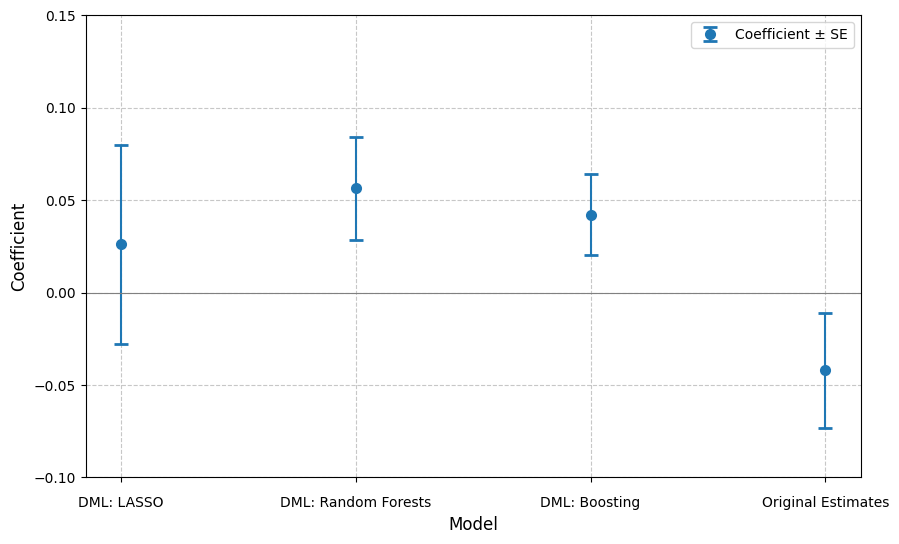

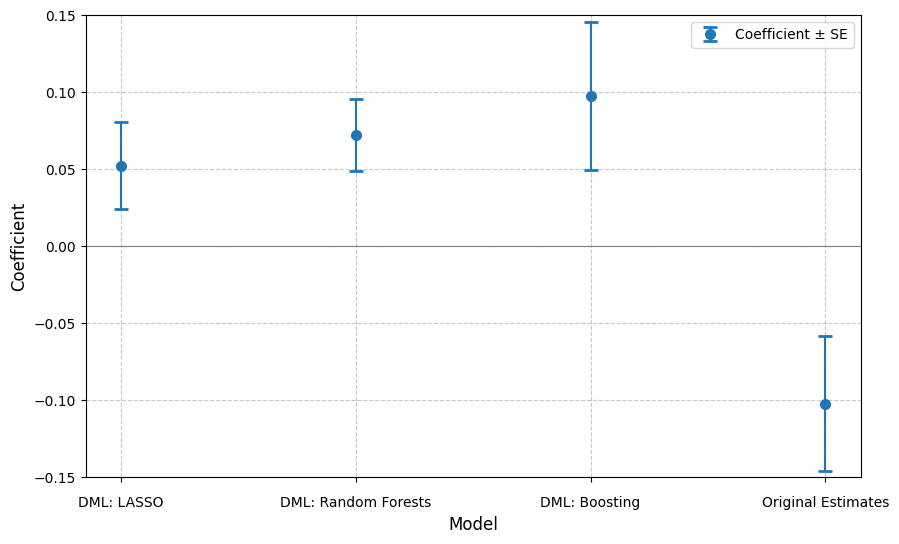

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ["DML: LASSO", "DML: Random Forests", "DML: Boosting", "Original Estimates"]
panel_a_coeffs = [0.0263, 0.0564, 0.0423, -0.042]
panel_a_errors = [0.0538, 0.0278, 0.0220, 0.031]
panel_b_coeffs = [0.0525, 0.0723, 0.0975, -0.102]
panel_b_errors = [0.0283, 0.0235, 0.0480, 0.044]

# Plot Panel A
plt.figure(figsize=(10, 6))
plt.errorbar(models, panel_a_coeffs, yerr=panel_a_errors, fmt='o', capsize=5, capthick=2, markeredgewidth=2, label='Coefficient ± SE')
plt.axhline(0, color='grey', linewidth=0.8)
#plt.title('Panel A: Without interactions with institutions', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.xticks(ticks=range(len(models)), labels=models, rotation=0, fontsize=10, ha='center', position=(0, -0.02))
plt.ylim(-0.1, 0.15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot Panel B
plt.figure(figsize=(10, 6))
plt.errorbar(models, panel_b_coeffs, yerr=panel_b_errors, fmt='o', capsize=5, capthick=2, markeredgewidth=2, label='Coefficient ± SE')
plt.axhline(0, color='grey', linewidth=0.8)
#plt.title('Panel B: With interactions with institutions', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.xticks(ticks=range(len(models)), labels=models, rotation=0, fontsize=10, ha='center', position=(0, -0.02))
plt.ylim(-0.15, 0.15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [182]:
#####################
# RANDOM FOREST with exog
#####################
obj_dml_data = dml.DoubleMLData(data_filtered, y_col=dependent[0], x_cols=exog, d_cols=endog, z_cols=instruments) #

learner = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=15, min_samples_leaf=2)
ml_l = clone(learner)
ml_m = clone(learner)
ml_r = clone(learner)

dml_pliv_obj_rf = dml.DoubleMLPLIV(obj_dml_data, ml_l, ml_m, ml_r)

# Define the parameter grids for hyperparameter tuning
par_grids_rf = {'ml_l': {'n_estimators': [50, 100, 200],
                      'max_features': [5, 10, 15, 20],
                      'max_depth': [10, 15, 20, 25],
                      'min_samples_leaf': [1, 2, 4]},
             'ml_m': {'n_estimators': [50, 100, 200],
                      'max_features': [5, 10, 15, 20],
                      'max_depth': [10, 15, 20, 25],
                      'min_samples_leaf': [1, 2, 4]},
             'ml_r': {'n_estimators': [50, 100, 200],
                      'max_features': [5, 10, 15, 20],
                      'max_depth': [10, 15, 20, 25],
                      'min_samples_leaf': [1, 2, 4]}}

# Perform hyperparameter tuning
dml_pliv_obj_rf.tune(par_grids_rf, search_mode='grid_search')

dml_pliv_obj_rf.fit().summary



,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,0.085479,0.067825,1.26029,0.207565,-0.047455,0.218412


In [188]:
dml_pliv_obj_rf.fit().summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,-0.0298,0.081927,-0.363736,0.716055,-0.190375,0.130775


- Gradient Boosting

In [13]:
#####################
# GRADIENT BOOSTING with exog
#####################

#obj_dml_data = dml.DoubleMLData(data_filtered, y_col=dependent[0], x_cols=exog, d_cols=endog, z_cols=instruments) #x_cols=exog, 
#obj_dml_data = dml.DoubleMLClusterData(data_filtered, y_col=dependent[0], x_cols=exog, d_cols=endog, z_cols=instruments, cluster_cols='country')

In [39]:
gradient_boosting_results = models.dml_gbm(obj_dml_data)
gradient_boosting_results

,Endogenous,Coefficient,Standard Error,t-Statistic,p-value,95_lower_ci,95_upper_ci,model
0,lnf_lf1,0.097541,0.048023,2.031159,0.042239,0.003419,0.191664,DML: Gradient Boosting
1,NEU_ep,-0.001565,0.004555,-0.343591,0.731154,-0.010492,0.007362,DML: Gradient Boosting
2,NEU_ls,0.005970,0.003653,1.634407,0.102173,-0.001189,0.013129,DML: Gradient Boosting
3,NEU_rr,-0.000839,0.004231,-0.198295,0.842814,-0.009131,0.007453,DML: Gradient Boosting


In [ ]:


learner_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=20, learning_rate=0.01)

ml_l_boosting = clone(learner_boosting)
ml_m_boosting = clone(learner_boosting)
ml_r_boosting = clone(learner_boosting)

# For boosting
dml_pliv_obj_boosting = dml.DoubleMLPLIV(obj_dml_data, ml_l_boosting, ml_m_boosting, ml_r_boosting)

# # Define the parameter grids for hyperparameter tuning
# par_grids = {'ml_l': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 15, 20, 25],
#                       'learning_rate': [0.01, 0.05, 0.1]},
#              'ml_m': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 15, 20, 25],
#                       'learning_rate': [0.01, 0.05, 0.1]},
#              'ml_r': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 15, 20, 25],
#                       'learning_rate': [0.01, 0.05, 0.1]}}

# Perform hyperparameter tuning
#dml_pliv_obj_boosting.tune(par_grids, search_mode='grid_search')

dml_pliv_obj_boosting.fit().summary  # Fit and show summary for boosting

In [181]:
dml_pliv_obj_boosting.fit().summary 

,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,0.035404,0.022919,1.544731,0.122411,-0.009517,0.080325


In [101]:
dml_pliv_obj_boosting.params

{'ml_l': {'lnf_lf1': [[{'learning_rate': 0.05,
     'max_depth': 10,
     'n_estimators': 100},
    {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100},
    {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100},
    {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100},
    {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100}]],
  'NEU_ep': [[{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}]],
  'NEU_ls': [[{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200},
    {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200},
    {'learning

In [102]:
dml_pliv_obj_boosting.fit().summary  # Fit and show summary for boosting

,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,2.545837,2.440401,1.043204,0.296854,-2.237262,7.328936
NEU_ep,-0.537765,0.900142,-0.597423,0.550225,-2.302011,1.226481
NEU_ls,-2.481135,1.610966,-1.540154,0.123523,-5.638570,0.676300
NEU_rr,-2.622646,2.910936,-0.900963,0.367608,-8.327976,3.082684


In [98]:
print(dml_pliv_obj_boosting)

================== DoubleMLPLIV Object ==================

------------------ Data summary      ------------------
Outcome variable: lne_p
Treatment variable(s): ['lnf_lf1', 'NEU_ep', 'NEU_ls', 'NEU_rr']
Covariates: ['lneu_lf1', 'd84', 'd85', 'd86', 'd87', 'd88', 'd89', 'd90', 'd91', 'd92', 'd93', 'd94', 'd95', 'd96', 'd97', 'd98', 'd99', 'trendbe', 'trendk', 'trende91', 'trend_91', 'trendgr', 'trendes', 'trendfr', 'trendie', 'trendit', 'trendlu', 'trendnl', 'trendat', 'trendpt', 'trendfi', 'trendse', 'trenduk', 'trendno', 'trendis', 'trendch', 'be', 'dk', 'de91', 'de_91', 'gr', 'es', 'fr', 'ie', 'it', 'lu', 'nl', 'at', 'pt', 'fi', 'se', 'uk', 'no', 'is', 'ch']
Instrument variable(s): ['nbosds12', 'noward12', 'nkosds12', 'nbos_ep', 'nowar_ep', 'nkos_ep', 'nbos_ls', 'nowar_ls', 'nkos_ls', 'nbos_rr', 'nowar_rr', 'nkos_rr']
No. Observations: 167

------------------ Score & algorithm ------------------
Score function: partialling out
DML algorithm: dml2

------------------ Machine learner 

In [44]:
#####################
# GRADIENT BOOSTING with exog
#####################

obj_dml_data = dml.DoubleMLData(data_filtered, y_col=dependent[0], d_cols=endog, z_cols=instruments) #x_cols=exog, 

learner_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=15, learning_rate=0.01)

ml_l_boosting = clone(learner_boosting)
ml_m_boosting = clone(learner_boosting)
ml_r_boosting = clone(learner_boosting)

# For boosting
dml_pliv_obj_boosting = dml.DoubleMLPLIV(obj_dml_data, ml_l_boosting, ml_m_boosting, ml_r_boosting)
dml_pliv_obj_boosting.fit().summary  # Fit and show summary for boosting

,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,0.035770,0.009802,3.649333,0.000263,0.016559,0.054981
NEU_ep,0.001736,0.001339,1.295915,0.195005,-0.000889,0.004360
NEU_ls,0.004192,0.001919,2.184549,0.028922,0.000431,0.007954
NEU_rr,-0.005110,0.001465,-3.487647,0.000487,-0.007982,-0.002238


- LASSO

In [40]:
lasso_results = models.dml_lasso(obj_dml_data)
lasso_results

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e-02, tolerance: 8.701e-03


,Endogenous,Coefficient,Standard Error,t-Statistic,p-value,95_lower_ci,95_upper_ci,model
0,lnf_lf1,0.052490,0.028284,1.855834,0.063477,-0.002945,0.107925,DML: LASSO
1,NEU_ep,0.001229,0.002618,0.469258,0.638885,-0.003903,0.006360,DML: LASSO
2,NEU_ls,0.008573,0.003381,2.535701,0.011222,0.001947,0.015200,DML: LASSO
3,NEU_rr,-0.002023,0.003269,-0.618754,0.536079,-0.008429,0.004384,DML: LASSO


In [47]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#####################
# LASSO with exog
#####################

obj_dml_data = dml.DoubleMLData(data_filtered, y_col=dependent[0], d_cols=endog, z_cols=instruments) #, x_cols=exog

# For Lasso
#learner_lasso = Lasso(alpha=0.1, max_iter=1000)
learner_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1, max_iter=1000))

ml_l_lasso = clone(learner_lasso)
ml_m_lasso = clone(learner_lasso)
ml_r_lasso = clone(learner_lasso)

# For Lasso
dml_pliv_obj_lasso = dml.DoubleMLPLIV(obj_dml_data, ml_l_lasso, ml_m_lasso, ml_r_lasso)
dml_pliv_obj_lasso.fit().summary  # Fit and show summary for Lasso

,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,0.034496,0.003450,9.999224,1.535963e-23,0.027735,0.041258
NEU_ep,0.000766,0.000992,0.772169,4.400142e-01,-0.001178,0.002710
NEU_ls,0.003843,0.001129,3.403344,6.656648e-04,0.001630,0.006057
NEU_rr,-0.003643,0.000637,-5.714943,1.097406e-08,-0.004892,-0.002394


- Merging results to an excel

In [152]:
######### One coefficient

list_of_results = []

list_of_results.append([lasso_results, random_forest_results, gradient_boosting_results])
    
    
# Flatten the list of lists
flat_list = [item for sublist in list_of_results for item in sublist]

# Convert the flattened list into a DataFrame
df_results = pd.DataFrame(flat_list)

df_results.to_excel(
    "/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/data/results_angrist_dml_noinstitutions.xlsx",
    index=False
)
print("----- success! ----")
    

----- success! ----


In [42]:
########## Multiple endogneous variables

# Concatenate all DataFrames
df_combined = pd.concat([random_forest_results, gradient_boosting_results, lasso_results], ignore_index=True)


df_combined.to_excel(
    "/Users/gabrieldiasmp/Documents/pasta_gabriel/codigo/master_thesis/data/results_angrist_dml_withinstitutions.xlsx",
    index=False
)
print("----- success! ----")
    

----- success! ----


- ClusteredData

In [199]:
obj_dml_data = dml.DoubleMLClusterData(data_filtered, y_col=dependent[0], x_cols=exog, d_cols=endog, z_cols=instruments, cluster_cols='country')

In [207]:
#####################
# GRADIENT BOOSTING with exog
#####################

learner_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=20, learning_rate=0.01)

ml_l_boosting = clone(learner_boosting)
ml_m_boosting = clone(learner_boosting)
ml_r_boosting = clone(learner_boosting)

# For boosting
dml_pliv_obj_boosting = dml.DoubleMLPLIV(obj_dml_data, ml_l_boosting, ml_m_boosting, ml_r_boosting)

# # Define the parameter grids for hyperparameter tuning
# par_grids = {'ml_l': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 15, 20, 25],
#                       'learning_rate': [0.01, 0.05, 0.1]},
#              'ml_m': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 15, 20, 25],
#                       'learning_rate': [0.01, 0.05, 0.1]},
#              'ml_r': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 15, 20, 25],
#                       'learning_rate': [0.01, 0.05, 0.1]}}

# # Perform hyperparameter tuning
# dml_pliv_obj_boosting.tune(par_grids, search_mode='grid_search')

dml_pliv_obj_boosting.fit().summary  # Fit and show summary for boosting


,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,0.045619,0.013246,3.443913,0.000573,0.019657,0.071581


In [216]:
#####################
# RANDOM FOREST with exog
#####################

learner = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=15, min_samples_leaf=2)
ml_l = clone(learner)
ml_m = clone(learner)
ml_r = clone(learner)

dml_pliv_obj_rf = dml.DoubleMLPLIV(obj_dml_data, ml_l, ml_m, ml_r)

# # Define the parameter grids for hyperparameter tuning
# par_grids_rf = {'ml_l': {'n_estimators': [50, 100, 200],
#                       'max_features': [5, 10, 15, 20],
#                       'max_depth': [10, 15, 20, 25],
#                       'min_samples_leaf': [1, 2, 4]},
#              'ml_m': {'n_estimators': [50, 100, 200],
#                       'max_features': [5, 10, 15, 20],
#                       'max_depth': [10, 15, 20, 25],
#                       'min_samples_leaf': [1, 2, 4]},
#              'ml_r': {'n_estimators': [50, 100, 200],
#                       'max_features': [5, 10, 15, 20],
#                       'max_depth': [10, 15, 20, 25],
#                       'min_samples_leaf': [1, 2, 4]}}

# # Perform hyperparameter tuning
# dml_pliv_obj_rf.tune(par_grids_rf, search_mode='grid_search')

dml_pliv_obj_rf.fit().summary


,coef,std err,t,P>|t|,2.5 %,97.5 %
lnf_lf1,0.066134,0.018179,3.637826,0.000275,0.030503,0.101765


- Test

In [162]:
country_without_is = [i for i in country if i not in ["is", 'ch', 'lu', 'gr']]

In [154]:
eu_immigration

['lnf_lf1']

In [189]:
#Build the dependent variable column
y_dependent = data_filtered[dependent]

#endogenous variables
x_endog = data_filtered[endog]

# exogenous variables
x_exog = data_filtered[exog] 

#Build out the instruments matrix. Statsmodels requires this matrix to contain not only all the
# instruments but also the variables in exog that will NOT be instrumented
#instruments = data_filtered[years + inst3b] #+ country + ['dold'] #WORKING!!!
z_instruments = data_filtered[instruments] #+ country + ['dold'] #WORKING!!! #["nowarpr1","nbospr1","nkospr1"]

#### WORKING
# Define the IV regression formula with multiple endogenous variables
formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
           '[lnf_lf1  ~ ' + '+ '.join(instruments) +  ']') #+ dold

###### THE PROBLEM IS WITH THE COUNTRY
# Define the IV regression formula with multiple endogenous variables
# formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
#            '[lnf_lf1  ~ ' + '+ '.join(inst3b) + '+' + ' + '.join(years) +  '+' + ' + '.join(country) + ']') #+ dold

print(formula)

lne_p ~ 1 + be + dk + de91 + de_91 + es + fr + ie + it + nl + at + pt + fi + se + uk + no + lneu_lf1 + d84 + d85 + d86 + d87 + d88 + d89 + d90 + d91 + d92 + d93 + d94 + d95 + d96 + d97 + d98 + d99 + [lnf_lf1  ~ nbosds12+ noward12+ nkosds12+ nbos_ep+ nowar_ep+ nkos_ep+ nbos_ls+ nowar_ls+ nkos_ls+ nbos_rr+ nowar_rr+ nkos_rr+ be+ dk+ de91+ de_91+ es+ fr+ ie+ it+ nl+ at+ pt+ fi+ se+ uk+ no+ lneu_lf1+ d84+ d85+ d86+ d87+ d88+ d89+ d90+ d91+ d92+ d93+ d94+ d95+ d96+ d97+ d98+ d99]


In [ ]:
#Build and train the IV2SLS model
iv2sls_model = IV2SLS(dependent=y_dependent, endog=x_endog, exog=sm.add_constant(x_exog), instruments=z_instruments)
iv2sls_model_results = iv2sls_model.fit()

#Print the training summary
print(iv2sls_model_results.summary)

In [ ]:
# Fit the IV regression model
results = IV2SLS.from_formula(formula, data=data_filtered).fit()

print(results.summary)

- Working instruments in python

In [32]:
#Build the dependent variable column
dependent = data_filtered[['lne_p']]

#endogenous variables
endog = data_filtered[['lnf_lf1']]

# exogenous variables
exog = data_filtered[['NEU_ls', 'NEU_ep', 'NEU_rr']] 

#Build out the instruments matrix. Statsmodels requires this matrix to contain not only all the
# instruments but also the variables in exog that will NOT be instrumented
instruments = data_filtered[years + inst3b] #+ country + ['dold']

# # # Define the IV regression formula with multiple endogenous variables
# formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
#            '[lnf_lf1  ~ ' + ' + '.join(years[3:]) + ' + ' + ' + '.join(country[2:]) +  ' + ' + ' + '.join(inst3b[2:]) + ']') #+ dold

#### WORKING
# Define the IV regression formula with multiple endogenous variables
formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
           '[lnf_lf1  ~ ' + '+ '.join(inst3b) + '+' + ' + '.join(years) +  ']') #+ dold

###### THE PROBLEM IS WITH THE COUNTRY
# Define the IV regression formula with multiple endogenous variables
# formula = ('lne_p ~ 1 + ' + ' + '.join(exog) + ' + ' +
#            '[lnf_lf1  ~ ' + '+ '.join(inst3b) + '+' + ' + '.join(years) +  '+' + ' + '.join(country) + ']') #+ dold

print(formula)


lne_p ~ 1 + NEU_ls + NEU_ep + NEU_rr + [lnf_lf1  ~ nbosds12+ noward12+ nkosds12+ nbos_ep+ nowar_ep+ nkos_ep+ nbos_ls+ nowar_ls+ nkos_ls+ nbos_rr+ nowar_rr+ nkos_rr+lneu_lf1 + d84 + d85 + d86 + d87 + d88 + d89 + d90 + d91 + d92 + d93 + d94 + d95 + d96 + d97 + d98 + d99]


In [33]:
# Fit the IV regression model
results = IV2SLS.from_formula(formula, data=data_filtered).fit()

print(results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  lne_p   R-squared:                      0.4264
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4194
No. Observations:                 334   F-statistic:                    185.90
Date:                Tue, Apr 23 2024   P-value (F-stat)                0.0000
Time:                        18:02:53   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -0.0805     0.0208    -3.8770     0.0001     -0.1211     -0.0398
NEU_ls         0.0038     0.0010     3.6419     0.00

In [30]:
#Build and train the IV2SLS model
iv2sls_model = IV2SLS(dependent=dependent, endog=endog, exog=sm.add_constant(exog), instruments=instruments)
iv2sls_model_results = iv2sls_model.fit()

#Print the training summary
print(iv2sls_model_results.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  lne_p   R-squared:                      0.4267
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4197
No. Observations:                 334   F-statistic:                    184.17
Date:                Tue, Apr 23 2024   P-value (F-stat)                0.0000
Time:                        17:09:04   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -0.0860     0.0213    -4.0461     0.0001     -0.1277     -0.0444
NEU_ls         0.0039     0.0010     3.8495     0.00

In [4]:
from datetime import date

# Define the dates
date1 = date(2022, 6, 30)
date2 = date(2022, 12, 29)

# Calculate the difference
difference = date2 - date1

# Extract days from the difference
days_difference = difference.days

# Print the result
print(f"The difference between {date1} and {date2} is {days_difference} days.")

The difference between 2022-06-30 and 2022-12-29 is 182 days.


# Immigration by Peri

In [72]:
growth = pd.read_excel("../data/barro_data.xlsx")

In [86]:
y = 'Outcome'
W = growth.drop(['Outcome', 'intercept', 'gdpsh465'], axis=1).columns.tolist()
D = ['gdpsh465']

In [91]:
#####################
# GRADIENT BOOSTING with exog
#####################

obj_dml_data = dml.DoubleMLData(growth, y_col=y, x_cols=W, d_cols=D) #x_cols=exog, 

learner_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=15, learning_rate=0.008)

ml_g_boosting = clone(learner_boosting)
ml_m_boosting = clone(learner_boosting)

# For boosting
dml_pliv_obj_boosting = dml.DoubleMLPLR(obj_dml_data, ml_g_boosting, ml_m_boosting)
dml_pliv_obj_boosting.fit().summary  # Fit and show summary for boosting

,coef,std err,t,P>|t|,2.5 %,97.5 %
gdpsh465,-0.011365,0.009281,-1.224466,0.220777,-0.029556,0.006826


In [ ]:
dml.DoubleMLPLR()